# UPPGIFT-3 KPIer & Explorativ Dataanalys

### Here we are going to formulate KPIs that will help us better understand the effect of covid and vaccination measure taken to curb it
### We will look at this KPIs:
- The mortality rate and recovery rate of Covid-19 across the provinces, ages and sexes
- The vaccination rate between males and females and across ages
- We will look at the effectiveness of vaccination against new cases across the provinces 


In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt

### Here we will look at the mortality rate across regions

In [190]:
covid_per_region_df = pd.read_excel("covid_data\Folkhalsomyndigheten_Covid19.xlsx", sheet_name= "Totalt antal per region")
covid_per_region_df

,Region,Totalt_antal_fall,Fall_per_100000_inv,Totalt_antal_intensivvårdade,Totalt_antal_avlidna
0,Blekinge,30866,19394.711670,85,184
1,Dalarna,75286,26166.565430,261,546
2,Gotland,11880,19786.651367,46,83
3,Gävleborg,74838,26032.677246,334,755
4,Halland,108997,32401.013916,229,522
5,Jämtland Härjedalen,34388,26228.635254,97,205
6,Jönköping,89804,24622.063477,417,761
7,Kalmar,62960,25598.851074,136,386
8,Kronoberg,51593,25525.897461,162,410
9,Norrbotten,50868,20372.598389,268,467


In [191]:
highest_death_region = covid_per_region_df.sort_values(by="Totalt_antal_avlidna", ascending=False) #sorting the provinces with the highest cases


fig = px.bar(data_frame = highest_death_region.iloc[:10], x="Region"  ,
    
    y="Totalt_antal_avlidna",
    labels={"Region": "Province", "Totalt_antal_avlidna": "Death Cases"},
    color="Region",
    title="Top 10 Regions with the highest Deaths",
    #log_y= True,
    barmode= "relative"
    
    
)
fig.show()
fig.write_html("data_visualization/top10RegionsWithHighestDeaths.html")

In [192]:
# Mortality rates and recovery rates
covid_per_region_df["Mortality_Rate"] = covid_per_region_df["Totalt_antal_avlidna"]*100/covid_per_region_df["Totalt_antal_fall"]
covid_per_region_df["Recovery_Rate"] = (covid_per_region_df["Totalt_antal_fall"] - covid_per_region_df["Totalt_antal_avlidna"])*100/covid_per_region_df["Totalt_antal_fall"]
covid_per_region_df


,Region,Totalt_antal_fall,Fall_per_100000_inv,Totalt_antal_intensivvårdade,Totalt_antal_avlidna,Mortality_Rate,Recovery_Rate
0,Blekinge,30866,19394.711670,85,184,0.596125,99.403875
1,Dalarna,75286,26166.565430,261,546,0.725234,99.274766
2,Gotland,11880,19786.651367,46,83,0.698653,99.301347
3,Gävleborg,74838,26032.677246,334,755,1.008846,98.991154
4,Halland,108997,32401.013916,229,522,0.478912,99.521088
5,Jämtland Härjedalen,34388,26228.635254,97,205,0.596138,99.403862
6,Jönköping,89804,24622.063477,417,761,0.847401,99.152599
7,Kalmar,62960,25598.851074,136,386,0.613088,99.386912
8,Kronoberg,51593,25525.897461,162,410,0.794681,99.205319
9,Norrbotten,50868,20372.598389,268,467,0.918062,99.081938


In [193]:
#Top 10 provinces with the highest mortality rate and highest recovery rates
top_death_provinces = covid_per_region_df.sort_values("Mortality_Rate", ascending=False) #sorting the by the highest mortality rates

fig = px.bar(data_frame = top_death_provinces.iloc[:10], x="Region"  ,
    
    y="Mortality_Rate",
    labels={"Region": "Province", "Mortality_Rate": "Mortality Rate"},
    color="Region",
    title="Top 10 Regions with the highest mortality Rates",
    #log_y= True,
    barmode= "relative"
    
    
)
fig.show()
fig.write_html("data_visualization/top10RegionsWithHighestMortalityRates.html")

fig1 = px.bar(data_frame = top_death_provinces.iloc[:10], x="Region"  ,
    
    y="Recovery_Rate",
    labels={"Region": "Province", "Recovery_Rate": "Mortality Rate"},
    color="Region",
    title="Top 10 Regions with the highest recovery Rates",
    #log_y= True,
    barmode= "relative"
    
    
)
fig1.show()
fig1.write_html("data_visualization/top10RegionsWithHighestRecoveryRates.html")



### Conclusion
- We can observe that some regions with the high deaths don't have high mortality rates such as Skåne which appears in the top regions with highest deaths but doesnt appear in the top 10 regions with the highest mortality rates
- High recovery rate regions have high mortality rates

### Men vs Women mortality rates

In [194]:
covid_per_sex = pd.read_excel("covid_data\Folkhalsomyndigheten_Covid19.xlsx", sheet_name= "Totalt antal per kön")
covid_per_sex

,Kön,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna
0,Man,1211237,6579,11331
1,Kvinna,1383473,2959,9315
2,Uppgift saknas,20287,47,107


In [195]:
covid_per_sex["Mortality_Rate"] = covid_per_sex["Totalt_antal_avlidna"]*100/covid_per_sex["Totalt_antal_fall"]
covid_per_sex

,Kön,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna,Mortality_Rate
0,Man,1211237,6579,11331,0.935490
1,Kvinna,1383473,2959,9315,0.673306
2,Uppgift saknas,20287,47,107,0.527431


In [196]:
male = covid_per_sex["Totalt_antal_fall"].iloc[0]
female = covid_per_sex["Totalt_antal_fall"].iloc[1]

male_mr = covid_per_sex["Mortality_Rate"].iloc[0]
female_mr = covid_per_sex["Mortality_Rate"].iloc[1]

fig = px.pie(names=["Male", "Female"], values=[male,female],
            title="MEN VS WOMEN COVID CASES")
fig1 = px.pie(names=["Male", "Female"], values=[male_mr,female_mr],
             title="MEN VS WOMEN MORTALITY RATE")

fig.show()
fig1.show()

fig.write_html("data_visualization/men_vs_women_covidcases.html")
fig1.write_html("data_visualization/men_vs_women_mortalityRate.html")

### Conclusion
- Mortality rate is higher in men than women even though women had a higher number of covid cases

### Mortality Across Ages

In [197]:
covid_per_age = pd.read_excel("covid_data\Folkhalsomyndigheten_Covid19.xlsx", sheet_name= "Totalt antal per åldersgrupp")
covid_per_age["Åldersgrupp"] = covid_per_age["Åldersgrupp"].replace(["Ålder_0_9","Ålder_10_19","Ålder_20_29",
"Ålder_30_39","Ålder_40_49","Ålder_50_59","Ålder_60_69","Ålder_70_79","Ålder_80_89","Ålder_90_plus"], 
["0_9","10_19","20_29","30_39","40_49","50_59","60_69","70_79","80_89","90_plus"])

covid_per_age

,Åldersgrupp,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna
0,0_9,138102,111,17
1,10_19,355852,100,10
2,20_29,418826,286,41
3,30_39,493884,493,71
4,40_49,475087,1000,174
5,50_59,379085,1936,525
6,60_69,180523,2605,1427
7,70_79,87527,2407,4675
8,80_89,58644,620,8362
9,90_plus,26919,21,5447


In [198]:
covid_per_age["Mortality_Rate"] = covid_per_age["Totalt_antal_avlidna"]*100/covid_per_age["Totalt_antal_fall"]
covid_per_age

,Åldersgrupp,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna,Mortality_Rate
0,0_9,138102,111,17,0.012310
1,10_19,355852,100,10,0.002810
2,20_29,418826,286,41,0.009789
3,30_39,493884,493,71,0.014376
4,40_49,475087,1000,174,0.036625
5,50_59,379085,1936,525,0.138491
6,60_69,180523,2605,1427,0.790481
7,70_79,87527,2407,4675,5.341209
8,80_89,58644,620,8362,14.258918
9,90_plus,26919,21,5447,20.234778


In [199]:
age_deaths = covid_per_age.sort_values("Mortality_Rate", ascending=False).reset_index() #sorting the by the highest mortality rates

figu = px.bar(data_frame = age_deaths, x="Åldersgrupp"  ,
    
    y="Mortality_Rate",
    labels={"Åldersgrupp": "Ages", "Mortality_Rate": "Mortality Rate"},
    color="Åldersgrupp",
    title="Mortality Rates Across Ages",
    #log_y= True,
    barmode= "relative"
    
    
)
figu.show()
figu.write_html("data_visualization/age_moratlity_rates.html")

### Conclusion
- Death was highest among the older ages from 50-59 and above. 

## Vaccination between Sexes

In [200]:
vaccin_per_sex =  pd.read_excel("covid_data\Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name= "Vaccinerade kön")
vaccin_per_sex

,Kön,Antal vaccinerade,Andel vaccinerade,Vaccinationsstatus
0,Totalt,7811112,0.859045,Minst 1 dos
1,Totalt,7628588,0.838971,Minst 2 doser
2,Män,3859036,0.845819,Minst 1 dos
3,Män,3760345,0.824188,Minst 2 doser
4,Kvinnor,3952076,0.872364,Minst 1 dos
5,Kvinnor,3868243,0.853859,Minst 2 doser


In [201]:
fig = px.bar(data_frame = vaccin_per_sex, x="Vaccinationsstatus",
    
    y= ["Antal vaccinerade"],
    labels={"Kön": "Sex", "value":"Total vaccinated", "variable": "Vaccination status" },
    color="Kön",
    title="Vaccination Status between Men And Women",
    #log_y= True,
    barmode= "group"
    
    
)
fig.show()
fig.write_html("data_visualization/men_women_vaccinationstatus.html")

### The Trend between vaccination and new cases
- Investigating the effectiveness of the vaccine

In [202]:
covid_data_df = pd.read_excel("covid_data\Folkhalsomyndigheten_Covid19.xlsx", sheet_name= "Veckodata Riket")

covid_data_df["år"] = covid_data_df["år"].astype(str) + "v" + covid_data_df["veckonummer"].astype(str)
covid_data_df = covid_data_df.rename({"år":"Vecka"}, axis=1)
covid_data_df.drop(["veckonummer", "Antal_fall_100000inv_14dagar", "Antal_fall_100000inv_vecka","Antal_nyaintensivvårdade_vecka",
               "Antal_avlidna_milj_inv_vecka", "Kum_antal_avlidna_milj_inv","Kum_fall_100000inv"], inplace=True, axis=1)
covid_data_df.head(5)

,Vecka,Antal_fall_vecka,Kum_antal_fall,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Kum_antal_avlidna
0,2020v6,1,1,0,0,0
1,2020v7,0,1,0,0,0
2,2020v8,0,1,0,0,0
3,2020v9,13,14,0,0,0
4,2020v10,211,225,3,0,0


In [203]:
vaccin_data_df = pd.read_excel("covid_data\Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name= "Vaccinerade tidsserie")
vaccin_data_df["Vecka"] = vaccin_data_df["År"].astype(str) + "v" + vaccin_data_df["Vecka"].astype(str)
vaccin_data_df.drop(["År"], inplace=True,axis=1)
vaccin_data_df.head(5)

,Vecka,Region,Antal vaccinerade,Andel vaccinerade,Vaccinationsstatus
0,2020v52,| Sverige |,1639,0.000180,Minst 1 dos
1,2020v52,| Sverige |,0,0.000000,Minst 2 doser
2,2020v52,Stockholm,201,0.000096,Minst 1 dos
3,2020v52,Stockholm,0,0.000000,Minst 2 doser
4,2020v52,Uppsala,5,0.000015,Minst 1 dos


In [204]:
vaccin_2_doser = vaccin_data_df[vaccin_data_df["Vaccinationsstatus"]=="Minst 2 doser"].reset_index(drop=True)
vaccin_2_doser.head(5)

,Vecka,Region,Antal vaccinerade,Andel vaccinerade,Vaccinationsstatus
0,2020v52,| Sverige |,0,0.0,Minst 2 doser
1,2020v52,Stockholm,0,0.0,Minst 2 doser
2,2020v52,Uppsala,0,0.0,Minst 2 doser
3,2020v52,Södermanland,0,0.0,Minst 2 doser
4,2020v52,Östergötland,0,0.0,Minst 2 doser


In [248]:
covid_vaccin_df = pd.merge(vaccin_2_doser, covid_data_df[["Vecka", "Antal_fall_vecka", "Antal_avlidna_vecka","Kum_antal_fall"]], 
on="Vecka", how="left")
covid_vaccin_df.head(5)

,Vecka,Region,Antal vaccinerade,Andel vaccinerade,Vaccinationsstatus,Antal_fall_vecka,Antal_avlidna_vecka,Kum_antal_fall
0,2020v52,| Sverige |,0,0.0,Minst 2 doser,37134,643,421337
1,2020v52,Stockholm,0,0.0,Minst 2 doser,37134,643,421337
2,2020v52,Uppsala,0,0.0,Minst 2 doser,37134,643,421337
3,2020v52,Södermanland,0,0.0,Minst 2 doser,37134,643,421337
4,2020v52,Östergötland,0,0.0,Minst 2 doser,37134,643,421337


In [249]:
covid_vaccin_df = covid_vaccin_df[covid_vaccin_df["Region"] == "| Sverige |"].reset_index(drop=True)
covid_vaccin_df

,Vecka,Region,Antal vaccinerade,Andel vaccinerade,Vaccinationsstatus,Antal_fall_vecka,Antal_avlidna_vecka,Kum_antal_fall
0,2020v52,| Sverige |,0,0.000000,Minst 2 doser,37134,643,421337
1,2020v53,| Sverige |,0,0.000000,Minst 2 doser,41323,663,462660
2,2021v1,| Sverige |,0,0.000000,Minst 2 doser,39446,644,502106
3,2021v2,| Sverige |,68,0.000007,Minst 2 doser,28935,598,531041
4,2021v3,| Sverige |,7995,0.000879,Minst 2 doser,23222,513,554263
...,...,...,...,...,...,...,...,...
92,2022v39,| Sverige |,7624819,0.838557,Minst 2 doser,13532,94,2599038
93,2022v40,| Sverige |,7625864,0.838672,Minst 2 doser,3999,98,2603037
94,2022v41,| Sverige |,7626821,0.838777,Minst 2 doser,3408,94,2606445
95,2022v42,| Sverige |,7627737,0.838878,Minst 2 doser,3278,70,2609723


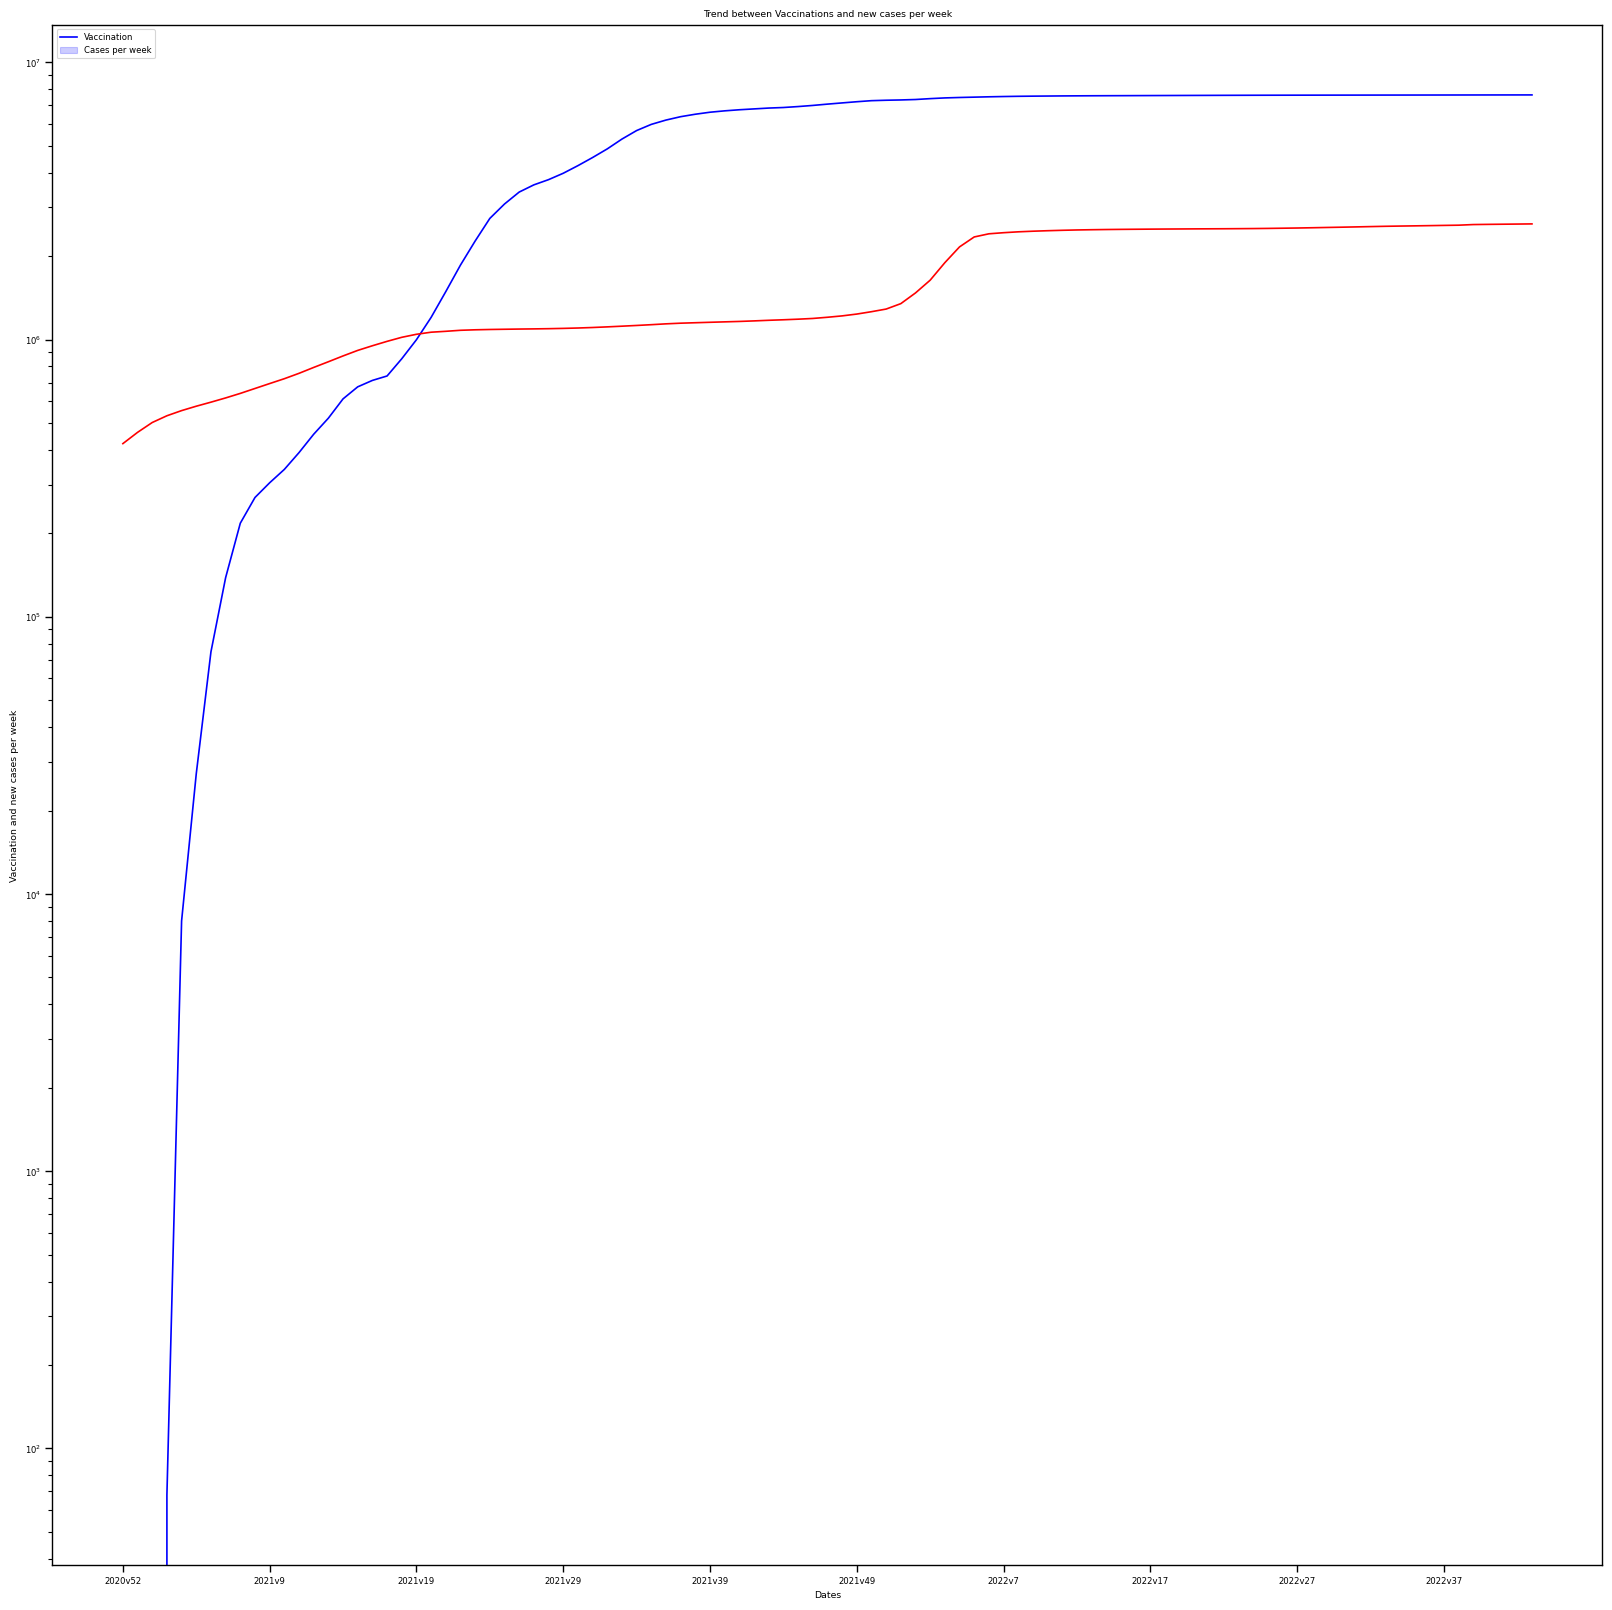

In [287]:

fig,ax = plt.subplots(figsize=(20,20))
sns.lineplot(data=covid_vaccin_df, x="Vecka", y="Antal vaccinerade",color="blue",ax=ax)


sns.lineplot(data=covid_vaccin_df, x="Vecka", y="Kum_antal_fall",color="red",ax=ax)
ax.set(title= "Trend between Vaccinations and new cases per week",xlabel="Dates", ylabel="Vaccination and new cases per week", xticks=covid_vaccin_df["Vecka"][::10])
ax.set_yscale("log")
ax.legend(["Vaccination", "Cases per week"], loc= "upper left")
plt.savefig("data_visualization/trend_btn_vaccs_&_new_cases.png")

In [286]:
fig = px.line(data_frame = covid_vaccin_df, x="Vecka",
    
    y= ["Antal vaccinerade", "Antal_fall_vecka"],
    labels={"Vecka": "Week", "value": "Total cases", "variable": "Line Type" },
  
    title="Trend between Vaccinations and new cases per week",
    #log_y= True,   
)
fig.update_layout(hovermode="x")
fig.update_xaxes(
        showspikes=True,
        spikedash="solid",
        spikecolor="green",
        spikemode="across",
        spikesnap="cursor",
    )
fig.show()
fig.write_html("data_visualization/vaccination_new_cases.html")

### Conclusion
- As the number of vaccinations around Sweden increased, the number of new cases decreased. 